In [2]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u
from astropy.constants import R_sun

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

import time
tstamp = time.strftime("%d_%m_%Y", time.localtime())


In [3]:
CWD = "/".join(os.getcwd().split("/")[:-2])
df = pd.read_csv(f"{CWD}/analysis/results/mcmc/mcmcoutput.csv")
df = df.drop_duplicates(keep=False).fillna("")

# Make sure that FWHM is FWHM as normal people understand it and not 2*FWHM!
for col in ['fwhm_d_16', 'fwhm_d_50', 'fwhm_d_84']:
    df[col] = df[col].astype(float) / 2.

# Plot Posteriors

In [20]:
columns = ["t0_d","latitude_deg","a","fwhm_d","i_deg","phase_deg"]
#props = pd.read_csv(f"{CWD}/data/summary/everything.csv")

inits = pd.read_csv(f"{CWD}/data/summary/inits.csv")

outs = pd.read_csv(f"{CWD}/analysis/results/mcmc/mcmcoutput.csv")
outs = outs.drop_duplicates(keep=False).fillna("")

,0,2,4
ED_s_16,23679.233628938244,4939.393681690124,4689.252093899038
ED_s_50,28430.451939980245,4987.53301895416,4724.917109765651
ED_s_84,33267.900613053636,5031.502652639912,4772.268163716125
Eflare_erg_16,2.6671583118473893e+34,4.381582618671682e+34,4.159689790542758e+34
Eflare_erg_50,3.202321383772594e+34,4.424285528588007e+34,4.191327117649338e+34
Eflare_erg_84,3.7471971867105346e+34,4.463289624054422e+34,4.233330765938046e+34
ID,277539431,237880881,237880881
a_16,2.049082759393461,2.7562492209603655,0.5093900718853825
a_50,2.464020916423625,2.7764773291748086,0.5135977542757703
a_84,2.8875033523019,2.7896262149455042,0.5189529058518371


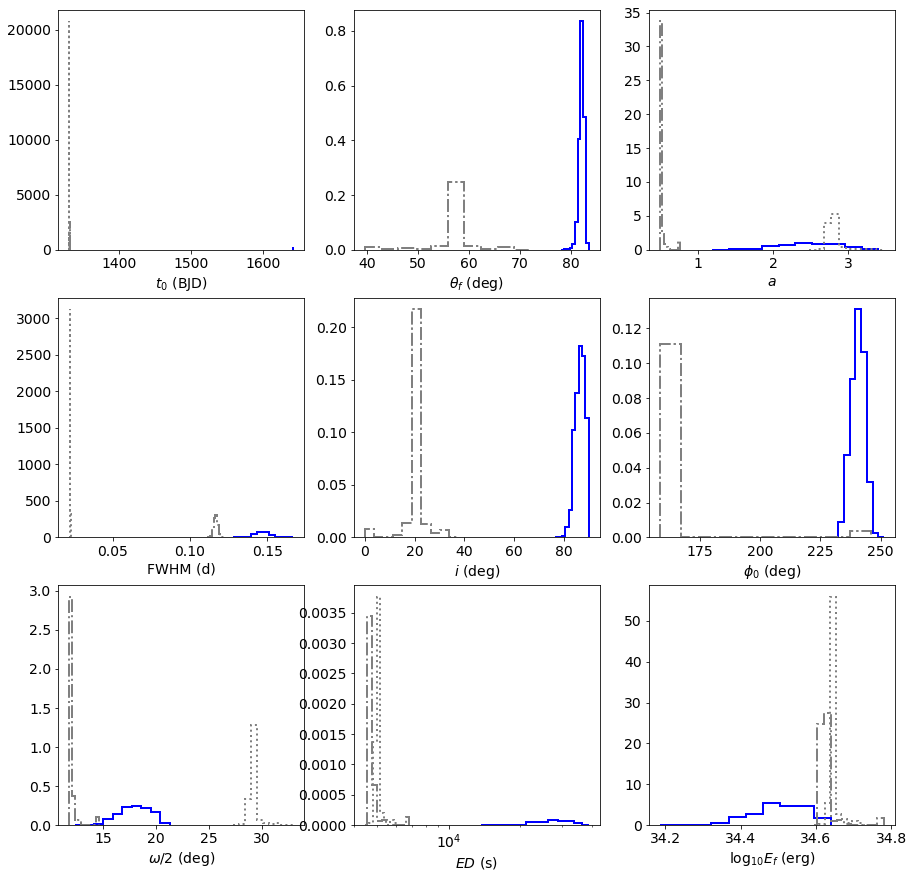

In [42]:
# Datasets we analysed
datasets = [(277539431, "", "08_07_2020_11_48"),
            (237880881, "a", "11_02_2020_10_07"),
            (237880881, "b", "11_02_2020_10_07"),
            ]

columns = ["t0_d","latitude_deg","a",
           "fwhm_d","i_deg","phase_deg",
           "rad_rsun","ED_s","Eflare_erg"]

fig, axp = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
axes = [a for ax in axp for a in ax]

for dataset in range(3):
    # What dataset do you want to analyse?
    ID, suffix, tstamp = datasets[dataset]

    # Pick up the input parameters
    CWD = "/".join(os.getcwd().split("/")[:-2])
    inits = pd.read_csv(f"{CWD}/data/summary/inits.csv")
    inits = inits[(inits.ID == str(ID)+suffix) &
                  (inits.tstamp==tstamp)].iloc[0]

    qlum = inits.qlum_erg_s * u.erg / u.s
    Fth = inits.Fth * u.erg / u.cm**2 / u.s
    median = inits['median']
    R = inits.R_Rsun * R_sun

    # Pick up the LC
    lc = pd.read_csv(f"{CWD}/data/lcs/{tstamp}_{ID}.csv")

    # Load MCMC chain
    resultframe = pd.read_csv(f"{CWD}/analysis/results/mcmc/"
                              f"{tstamp}_{ID}{suffix}_converted_mcmc_sample.csv")
    resultframe.Eflare_erg = np.log10(resultframe.Eflare_erg) 
    old = resultframe.shape[1]

    if 'Unnamed: 0' in resultframe.columns:
        resultframe = resultframe.drop('Unnamed: 0', axis=1)

    choose = (outs.ID == str(ID)) & (outs.suffix == suffix)
    color, linestyle = outs[choose].color.iloc[0], outs[choose].linestyle.iloc[0]
    
    
    for ax, col in zip(axes, columns):
        ax.hist(resultframe[col].values, 
                histtype="step", linewidth=2, density=True,
                linestyle=linestyle, color=color,
                label=f"{ID}")
        
        
valout = [("t0_d", r"$t_0$ (BJD)"),
          ("latitude_deg", r"$\theta_f$ (deg)"),
          ("a",r"$a$"),
          ("fwhm_d", r"FWHM (d)"),
          ("i_deg",r"$i$ (deg)"),
          ("phase_deg",r"$\phi_0$ (deg)"),
          ("rad_rsun", r"$\omega/2$ (deg)"),
          ("ED_s", r"$ED$ (s)"),
          ("Eflare_erg",r"$\log_{10} E_{f}$ (erg)"),
          ]       

for ax, col in zip(axes, valout):
    colb, colp = col
    ax.set_xlabel(colp)
    if colb in ["ED_s"]:
        ax.set_xscale("log")